<a href="https://colab.research.google.com/github/u-t-k-a-n/Detection-of-Similar-Points-in-Traffic-Characteristics/blob/main/Saturday2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import calendar
from google.colab import drive
drive.mount('/content/drive')
path = "drive/MyDrive/2017_concat/Concat_2017.csv"

Mounted at /content/drive


In [ ]:
df = pd.read_csv(path)
saturday_index = set()

In [ ]:
for i in range(0,len(df),24*60//5):
  date = df.iloc[i]["time"]
  year = int(date[:4])
  month = int(date[5:7])
  day = int(date[8:10])  

  if  calendar.weekday(year,month,day) == 5:
    saturday_index.add(i)

In [ ]:
all_index = list()
for i in saturday_index:
  for j in range(24*60//5):
    all_index.append(i+j)

In [ ]:
x = list()
for i in all_index:
  x.append(df.loc[i])
df2 = pd.DataFrame()
df2 = df2.append(x)

In [ ]:
df2.drop(columns="time",axis=1,inplace=True)
cols = list(df2.columns)
arr = np.array(df2)
corr = np.corrcoef(arr,rowvar=False)

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster,dendrogram
from scipy.spatial.distance import squareform
corr = (corr + corr.T)/2  # making symmetric
np.fill_diagonal(corr, 1) # making diagonal 1
dissimilarity = 1 - np.abs(corr)

In [ ]:
from collections import defaultdict

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='single')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

2

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='complete')
labels = fcluster(hierarchy, 0.99, criterion='distance')
labels.max()

7

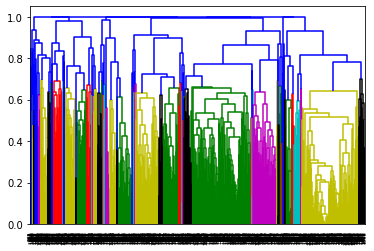

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:4 len:227
cluster:5 len:433
cluster:3 len:151
cluster:7 len:353
cluster:2 len:201
cluster:1 len:95
cluster:6 len:6


In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/SaturdayCompleteClusterCoord_2017.csv")

In [ ]:
import plotly.express as px
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/SaturdayCompleteClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='weighted')
labels = fcluster(hierarchy, 0.71, criterion='distance')
labels.max()

31

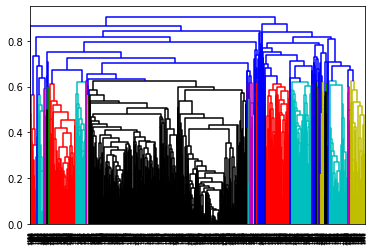

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:5 len:161
cluster:6 len:735
cluster:28 len:163
cluster:19 len:116
cluster:23 len:7
cluster:3 len:42
cluster:4 len:13
cluster:20 len:104
cluster:26 len:23
cluster:2 len:27
cluster:9 len:12
cluster:8 len:4
cluster:18 len:1
cluster:12 len:2
cluster:10 len:3
cluster:27 len:11
cluster:24 len:2
cluster:25 len:17
cluster:21 len:1
cluster:17 len:2
cluster:15 len:7
cluster:16 len:1
cluster:13 len:1
cluster:11 len:1
cluster:14 len:1
cluster:1 len:3
cluster:30 len:1
cluster:22 len:1
cluster:29 len:1
cluster:7 len:2
cluster:31 len:1


In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/SaturdayWeightedClusterCoord_2017.csv")

In [ ]:
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/SaturdayWeightedClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='centroid')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

7

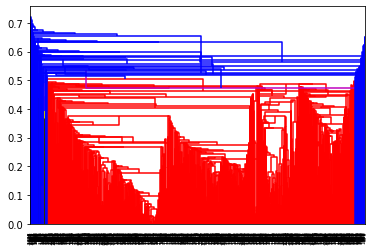

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:1 len:1460
cluster:5 len:1
cluster:4 len:1
cluster:3 len:1
cluster:2 len:1
cluster:6 len:1
cluster:7 len:1


In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='average')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

25

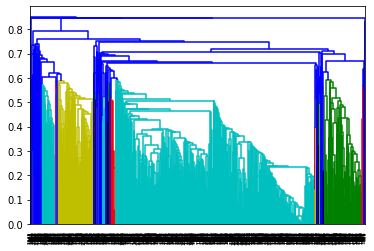

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:15 len:957
cluster:19 len:185
cluster:10 len:240
cluster:17 len:11
cluster:11 len:12
cluster:13 len:4
cluster:8 len:3
cluster:3 len:4
cluster:5 len:6
cluster:2 len:3
cluster:1 len:11
cluster:4 len:3
cluster:18 len:6
cluster:7 len:2
cluster:14 len:7
cluster:16 len:1
cluster:21 len:1
cluster:9 len:2
cluster:22 len:1
cluster:20 len:1
cluster:23 len:1
cluster:6 len:1
cluster:24 len:1
cluster:12 len:2
cluster:25 len:1


In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/SaturdayAverageClusterCoord_2017.csv")

In [ ]:
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/SaturdayAverageClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()